In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing the dataset
dataset = pd.read_table('/content/Restaurant_Reviews.csv')
dataset


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
dataset.describe()


,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [ ]:
dataset.columns

Index(['Review', 'Liked'], dtype='object')

In [ ]:
#categorizing Liked column
print(dataset['Liked'].unique())

[1 0]


In [ ]:
#to know counts of 0's and 1's
dataset['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

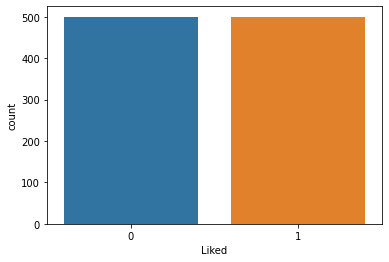

In [ ]:
#graphical representation
plt.figure()
sns.countplot(x=dataset.Liked);

In [ ]:
x=dataset['Review'].values
y=dataset['Liked'].values

In [ ]:
#splitting data into training and testing data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [ ]:
x_train.shape

(750,)

In [ ]:
y_train.shape

(750,)

In [ ]:
x_test.shape

(250,)

In [ ]:
y_test.shape

(250,)

In [ ]:
#importing countervectorizer 
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words='english')

In [ ]:
x_train_vect=vect.fit_transform(x_train)
x_test_vect=vect.transform(x_test)

In [ ]:
#importing support vector machine
from sklearn.svm import SVC
model=SVC()

In [ ]:
#training the model
model.fit(x_train_vect,y_train)

SVC()

In [ ]:
#predicting results 
y_pred=model.predict(x_test_vect)

In [ ]:
#performance metrics accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.72

In [ ]:
#importing libraries for pipeline
from sklearn.pipeline import make_pipeline
text_model=make_pipeline(CountVectorizer(),SVC())

In [ ]:
#training the model
text_model.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

In [ ]:
#testing the model
y_pred=text_model.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0])

In [ ]:
#performance metrics accuracy
accuracy_score(y_pred,y_test)

0.792

In [ ]:
x=text_model.predict(['hello!!Love Your Food'])
print(x)

[1]


In [ ]:
x=text_model.predict(["omg!!it was too spice and i asked you don't add too much "])
print(x)

[0]


In [ ]:
x=text_model.predict(["Appetite instantly gone.	"])
print(x)

[0]
